In [1]:
!pip install matplotlib


In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
## Data preprocessing
## Training Image Preprocessing
 
train_datagen = ImageDataGenerator(featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 rotation_range=5,
                 width_shift_range=0.05,
                 height_shift_range=0.05,
                 shear_range=0.2,
                 zoom_range=0.2,
                 channel_shift_range=0.,
                 fill_mode='nearest',
                 cval=0.,
                 horizontal_flip=True,
                 vertical_flip=False,
                 rescale=1/255)
training_set = train_datagen.flow_from_directory(
   "C:\\Users\\divya\\Desktop\\train",target_size=(64,64),batch_size=64,class_mode='categorical')

Found 792 images belonging to 9 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        "C:\\Users\\divya\\Desktop\\test",
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 921 images belonging to 9 classes.


In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=9 , activation='softmax'))
cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [6]:
cnn.fit(x = training_set , validation_data = test_set , epochs = 50)

Epoch 1/50


13/13 [==============================] - 9s 659ms/step - loss: 2.2425 - accuracy: 0.1376 - val_loss: 2.0691 - val_accuracy: 0.0543
Epoch 2/50
13/13 [==============================] - 7s 595ms/step - loss: 2.1219 - accuracy: 0.2159 - val_loss: 2.0792 - val_accuracy: 0.1618
Epoch 3/50
13/13 [==============================] - 8s 628ms/step - loss: 2.1047 - accuracy: 0.2386 - val_loss: 2.0179 - val_accuracy: 0.2258
Epoch 4/50
13/13 [==============================] - 7s 565ms/step - loss: 1.9814 - accuracy: 0.2765 - val_loss: 2.0495 - val_accuracy: 0.1629
Epoch 5/50
13/13 [==============================] - 8s 590ms/step - loss: 1.9235 - accuracy: 0.3409 - val_loss: 2.4600 - val_accuracy: 0.1075
Epoch 6/50
13/13 [==============================] - 7s 573ms/step - loss: 1.8659 - accuracy: 0.3144 - val_loss: 2.2022 - val_accuracy: 0.1716
Epoch 7/50
13/13 [==============================] - 7s 581ms/step - loss: 1.7983 - accuracy: 0.3535 - val_loss: 2.0591 - val_accuracy: 0.1835
Epoc

In [8]:
# Load and preprocess the test image
test_image = tf.keras.utils.load_img("C:\\Users\\divya\\Desktop\\baklava.jpeg", target_size=(64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make a prediction
result = cnn.predict(test_image)
print(result)

# Map the prediction to class labels
class_labels = [
    'Apple Pie', 'Baby Back Ribs','Baklava','Beef Carpaccio',
    'Beef Tartare', 'Beef Salad', 'Beignets', 'Bibimbap', 'Bread Pudding'
]

# Find the index with the highest probability
predicted_class_index = np.argmax(result)
print(predicted_class_index)
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)

# Print the predicted class label as "Bibimbap" if the predicted index is 7
if predicted_class_index == 7:
    print("Bibimbap")
else:
    print("Not Bibimbap")


1/1 [==============================] - 0s 17ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]
2
Baklava
Not Bibimbap


1/1 [==============================] - 0s 38ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]


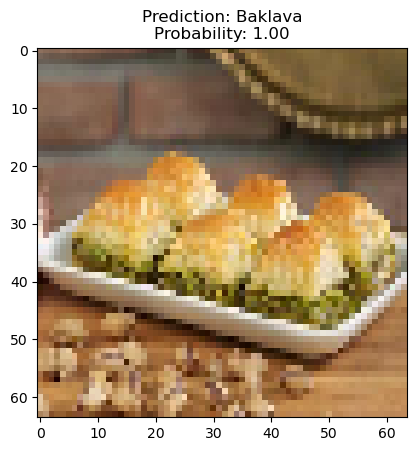

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the test image
test_image = tf.keras.utils.load_img("C:\\Users\\divya\\Desktop\\baklava.jpeg", target_size=(64, 64))
test_image_array = tf.keras.utils.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Make a prediction
result = cnn.predict(test_image_array)
print(result)

# Map the prediction to class labels
class_labels = [
    'Apple Pie', 'Baby Back Ribs','Baklava','Beef Carpaccio',
    'Beef Tartare', 'Beef Salad', 'Beignets', 'Bibimbap', 'Bread Pudding'
]

# Find the index with the highest probability
predicted_class_index = np.argmax(result)

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Visualize the image and prediction
plt.imshow(test_image)
plt.title(f'Prediction: {predicted_class_label}\nProbability: {result[0][predicted_class_index]:.2f}')
plt.show()
